# Chapter 9: Unsupervised Learning Methods

When you don't have labeled data. What can you do? Clustering, mostly. This was called "Data Mining" back in the day before the AI/ML hype overtook the Data Mining hype.


In [55]:
# Common imports

from matplotlib.image import imread
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpl_toolkits.mplot3d.axes3d as p3

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt

import matplotlib.cm as cm
import numpy as np


## K-means clustering

Let's use K-means and generate our own data since the book doesn't talk about creating any data for clustering.

In [26]:
# Generate the dataset
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=42)

# X are the features, y is the correct cluster ids

In [24]:
X[:,0].shape

(500,)

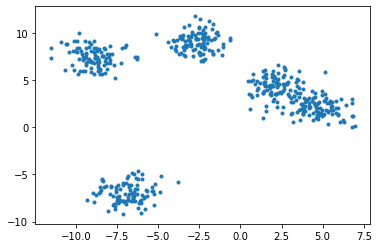

In [40]:
# And plot it
# scaled_color = y.astype(np.float32) / 10.0
plt.scatter(X[:,0], X[:, 1], marker='.')
plt.axis("on")
plt.show()

In [31]:
k=5
kmeans = KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(X)
accuracy_score(y_pred, y)

0.588

In [38]:
plt.scatter?

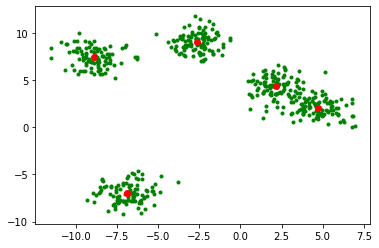

In [39]:
# And plot it
# scaled_color = y.astype(np.float32) / 10.0
plt.scatter(X[:,0], X[:, 1], color='green', marker='.')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')
plt.axis("on")
plt.show()

That was pretty close. I suspect the accuracy is low because the IDs of the clusters don't match up, but the clusters are great. Let's find other measures to see how good this clustering is, since accuracy is not something we would have in real-world data.

SK-Learn has a great page about making [Silhouette diagrams](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py).

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5935906353233216
For n_clusters = 3 The average silhouette_score is : 0.7083526015838516
For n_clusters = 4 The average silhouette_score is : 0.7328381899726921
For n_clusters = 5 The average silhouette_score is : 0.6786441315351273
For n_clusters = 6 The average silhouette_score is : 0.6206122073381205


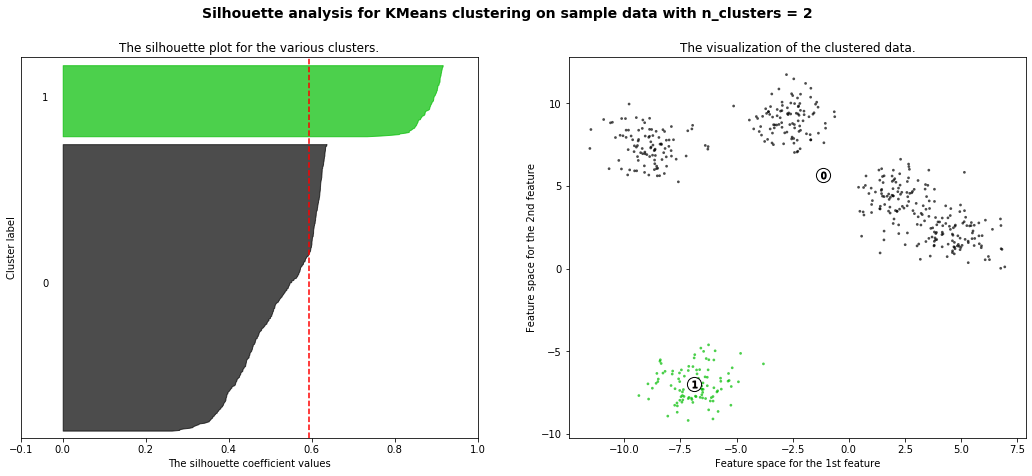

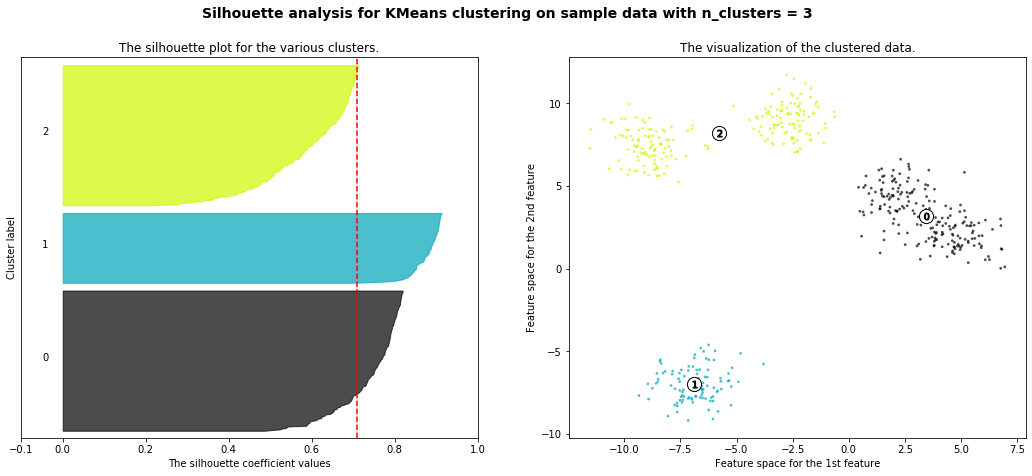

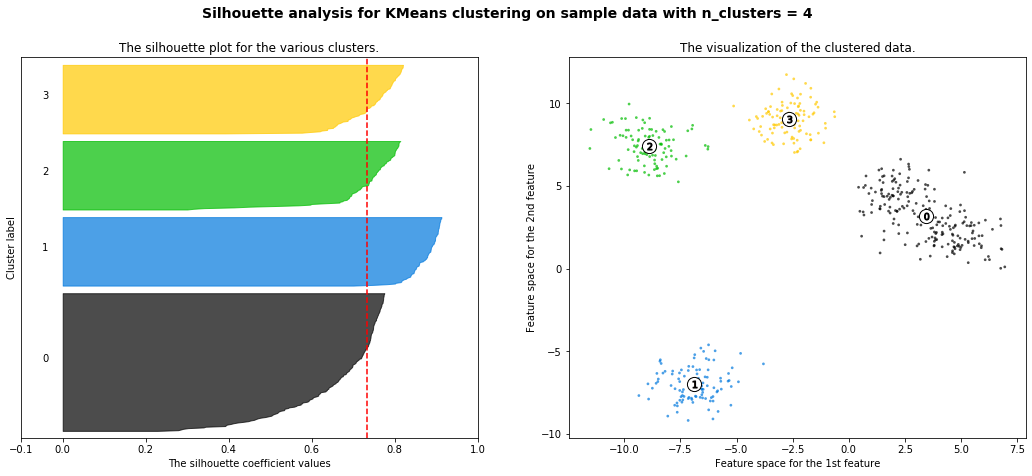

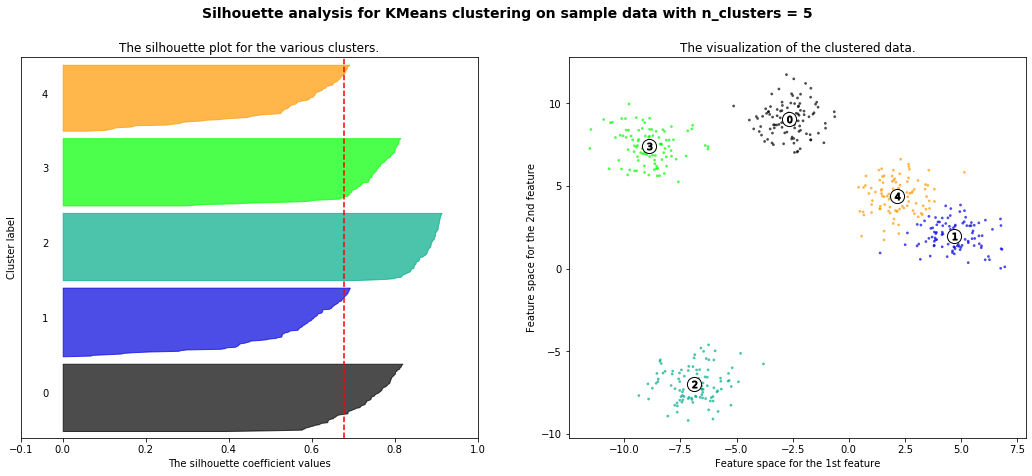

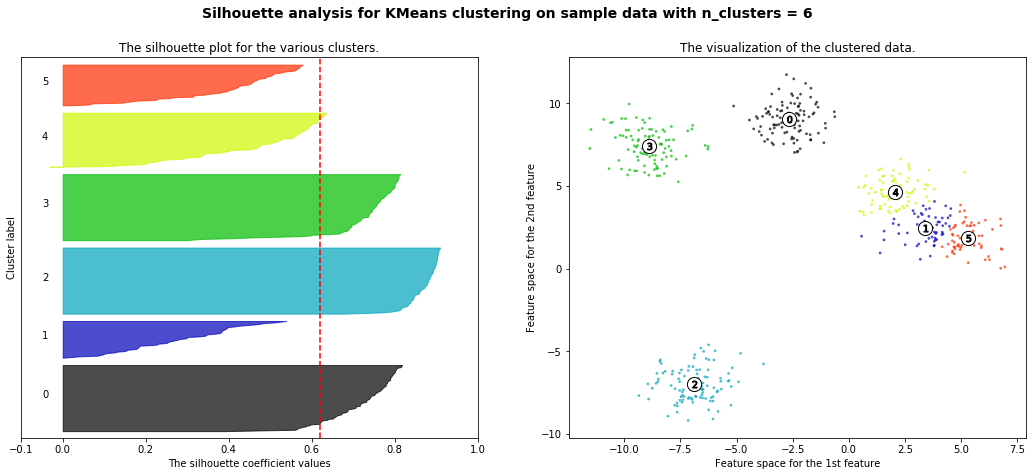

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

If we didn't know how the data was produced, I would be inclined to select four clusters rather than 5.

# Image segmentation

One use of clustering is image segmentation. You assign segments based on color values, and that identifies objects in the scene.

I didn't find the image used in the book. Let's pick something difficult, like [this image](https://www.nps.gov/pinn/learn/nature/ladybugs.htm) which as lots of ladybugs. Could be used to calculate how many ladybugs there are.

In [44]:
# Common imports

from matplotlib.image import imread
from sklearn.cluster import KMeans

import os
# Picking a somewhat difficult ladybugs file
ladies = imread(os.path.join("images", "ladybugs.jpg"))


In [47]:
# -1 signifies flatten it, but along what axis (row-major or column-major)?
X_ladies = ladies.reshape(-1, 3)
kmeans = KMeans(n_clusters=5)


In [48]:
kmeans.fit(X_ladies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(ladies.shape)

In [62]:
kmeans.cluster_centers_.shape

(5, 3)

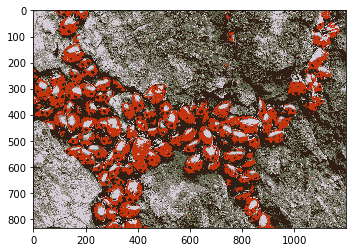

In [63]:
plt.imshow(segmented_image.astype(np.int32))
plt.show()

How big are the clusters, and how does the magic indexing operator cluster_centers_\[labels_\] work?

Let's try to find out but not spend too much time because this requires a good handle on numpy foundations that I need to get at some point.

Let's print each cluster center. There's only five of them.

In [67]:
kmeans.cluster_centers_[[0, 1, 0, 1]]

array([[ 49.62757733,  30.18278619,  21.49274675],
       [154.52576245, 147.56491508, 141.70072975],
       [ 49.62757733,  30.18278619,  21.49274675],
       [154.52576245, 147.56491508, 141.70072975]])

So this is how the indexing works. labels_ has the entire image flattened out with a single index indicating the label: 0, 1, 2, 0, ..., and so on.

And cluster_centers_ can be indexed by the same label. And so when you index using labels, you get a matrix as long as labels is! And that's the same size as the original image, using the color of cluster_centers. Brilliant.


In [83]:
def show_cluster(original_image_shape, index=0, kmeans=kmeans):
    "Show the cluster with the specified index"
    selected_cluster = kmeans.cluster_centers_.copy()
    
    # For all the other values, set them to pink (doesn't exist in image)
    # Total number of clusters
    n = selected_cluster.shape[0]
    # Create an indexing array with False only at the position 'index', False otherwise
    unselected = [True,] * n
    unselected[index] = False
    
    # Now set the color of index to black. White elsewhere
    selected_cluster[unselected] = [0, 0, 0]
    selected_cluster[index] = [1, 0, 0]

    image = selected_cluster[kmeans.labels_]
    
    picture = image.reshape(original_image_shape)
    plt.imshow(picture)
    plt.show()
    

def show_all_clusters(image_shape, kmeans=kmeans):
    "Show all clusters for this segmentation"
    # Number of clusters
    n = kmeans.cluster_centers_.shape[0]
    # Show each cluster
    for i in range(n):
        show_cluster(image_shape, i, kmeans)
    

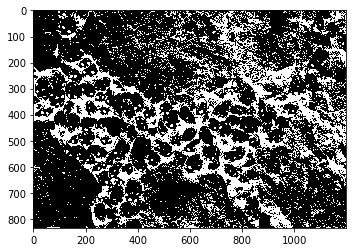

In [79]:
show_cluster(ladies.shape, 0, kmeans)

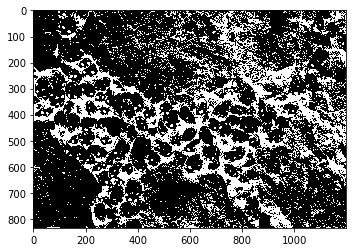

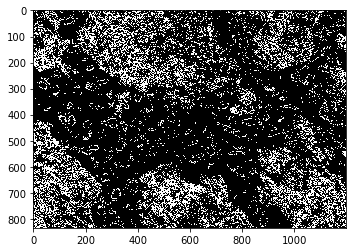

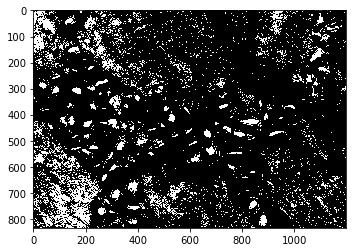

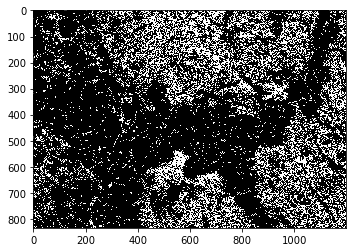

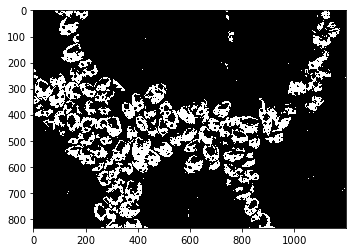

In [81]:
show_all_clusters(ladies.shape, kmeans)

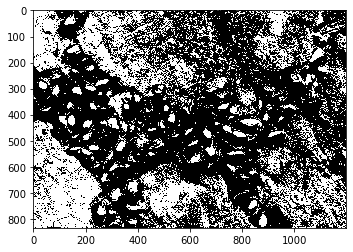

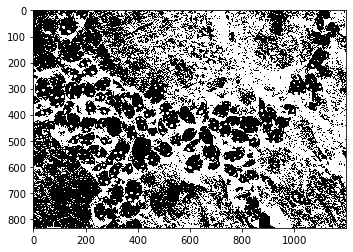

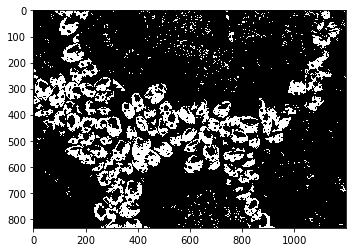

In [82]:
# Let's try fewer clusters, and see what they look like

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_ladies)
show_all_clusters(ladies.shape, kmeans)

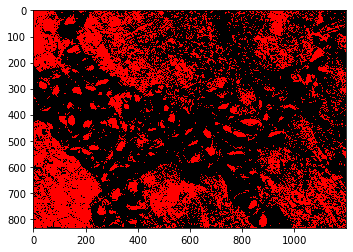

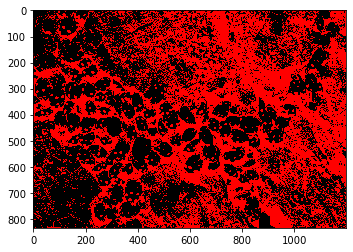

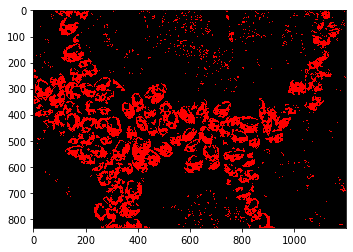

In [84]:
# Let's try fewer clusters, and see what they look like

show_all_clusters(ladies.shape, kmeans)

That might be decent.
* Cluster 0 is the rocks
* Cluster 0 is the rocks leaves
* Cluster 0 is the ladybugs.


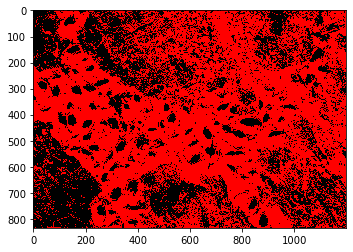

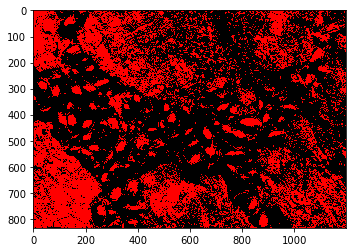

In [86]:
# How about just two clusters?
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_ladies)
show_all_clusters(ladies.shape, kmeans)

That was too few clusters. The rocks are now clustered along with the ladybugs, and the whole thing is a mess.

# Preprocessing

Clustering can be used to pre-process data to make it easier to see patterns and learn them using supervised learning. Let's use this idea on the mnist digits again.

In [93]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_d, y_d = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d)
log_reg = LogisticRegression()

In [94]:
log_reg.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
log_reg.score(X_test, y_test)

0.9688888888888889

That was without any training, 96.8% accuracy. Also recognize that a trivial classifier
that answers '5' for every case would get 90% accuracy because there are roughly 1/10th
for each number, so 96.8% is good, but not great.

So let's do k-means clustering, this time calling .fit_transform(X_train) which replaces attributes (bit pixel values) by cluster ID's + distance, which transforms
the space, but logistic regression should work better if the clusters are meaningful.


In [97]:
from sklearn.pipeline import Pipeline

clustering = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('logistic', LogisticRegression())
])

clustering.fit(X_train, y_train)
clustering.score(X_test, y_test)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9777777777777777

# Exercises

In [2]:
# Get the olivetti_faces data
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [3]:
olivetti

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========